# import libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import dataset

In [10]:
data=pd.read_csv('titanic.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [29]:
data1=data.iloc[:,[1,2,4,5,6,7,11]]
data1

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
888,0,3,female,NaN,1,2,S
889,1,1,male,26.0,0,0,C


# pre-processing

## handle categorical data

In [46]:
data1.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Embarked     object
dtype: object

In [38]:
data1.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [39]:
data1.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [40]:
data1.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [41]:
data1.Age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [42]:
data1.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [43]:
data1.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [45]:
data1.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [47]:
data2=data1.replace({'Sex':'male'},1).replace({'Sex':'female'},0)

In [49]:
data3=pd.get_dummies(data2)
data3

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,0,0,1
1,1,1,0,38.0,1,0,1,0,0
2,1,3,0,26.0,0,0,0,0,1
3,1,1,0,35.0,1,0,0,0,1
4,0,3,1,35.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,0,0,1
887,1,1,0,19.0,0,0,0,0,1
888,0,3,0,NaN,1,2,0,0,1
889,1,1,1,26.0,0,0,1,0,0


## handle missing value

In [50]:
data3.isna().sum()

Survived        0
Pclass          0
Sex             0
Age           177
SibSp           0
Parch           0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [51]:
data3.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,0.188552,0.086420,0.722783
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,0.391372,0.281141,0.447876
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,1.000000,1.000000,1.000000


In [52]:
data3.mode()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,24.0,0,0,0,0,1


In [58]:
data4=data3.fillna({'Age':29.6})

In [59]:
data4.isna().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

## handle outlier data

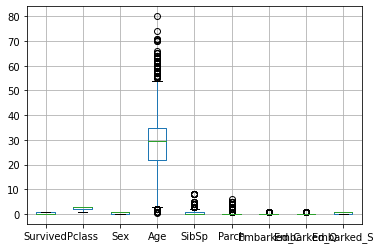

In [60]:
data4.boxplot()

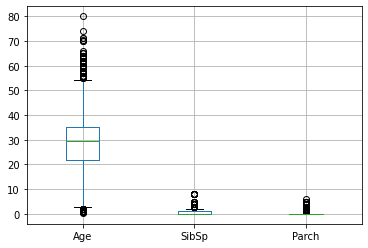

In [61]:
data4.iloc[:,[3,4,5]].boxplot()

In [62]:
#Age
Q1=data4.iloc[:,3].quantile(0.25)
Q3=data4.iloc[:,3].quantile(0.75)
LB=Q1-1.5*(Q3-Q1)
UB=Q3+1.5*(Q3-Q1)
print(LB,UB)

2.5 54.5


In [65]:
data5=data4[data4['Age']<=54.5]

In [66]:
#SibSP
Q1=data5.iloc[:,4].quantile(0.25)
Q3=data5.iloc[:,4].quantile(0.75)
LB=Q1-1.5*(Q3-Q1)
UB=Q3+1.5*(Q3-Q1)
print(LB,UB)

-1.5 2.5


In [67]:
data5[data5['SibSp']>=2.5].shape

(46, 9)

In [68]:
#parch
Q1=data5.iloc[:,5].quantile(0.25)
Q3=data5.iloc[:,5].quantile(0.75)
LB=Q1-1.5*(Q3-Q1)
UB=Q3+1.5*(Q3-Q1)
print(LB,UB)

0.0 0.0


## handle duplicated data

In [69]:
data5.duplicated().sum()

303

## feature selection

### brute_force

In [71]:
data5.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.360756,-0.535524,-0.059379,-0.041456,0.086382,0.169137,0.011347,-0.157857
Pclass,-0.360756,1.000000,0.148743,-0.275236,0.073140,0.023152,-0.231509,0.215413,0.069686
Sex,-0.535524,0.148743,1.000000,0.060575,-0.112200,-0.256859,-0.087221,-0.082768,0.131915
Age,-0.059379,-0.275236,0.060575,1.000000,-0.231549,-0.202006,0.014614,-0.012718,-0.007061
SibSp,-0.041456,0.073140,-0.112200,-0.231549,1.000000,0.416665,-0.059608,-0.026378,0.069902
Parch,0.086382,0.023152,-0.256859,-0.202006,0.416665,1.000000,-0.017462,-0.080491,0.067424
Embarked_C,0.169137,-0.231509,-0.087221,0.014614,-0.059608,-0.017462,1.000000,-0.147184,-0.776775
Embarked_Q,0.011347,0.215413,-0.082768,-0.012718,-0.026378,-0.080491,-0.147184,1.000000,-0.503922
Embarked_S,-0.157857,0.069686,0.131915,-0.007061,0.069902,0.067424,-0.776775,-0.503922,1.000000


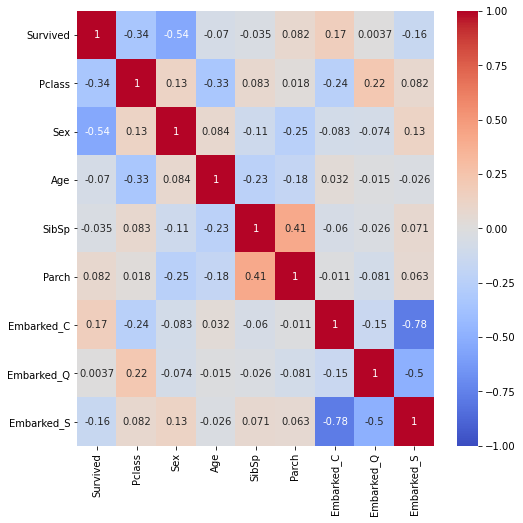

In [72]:
import seaborn as sns
fig=plt.figure(figsize=(8,8))
sns.heatmap(data4.corr(), vmin=-1 , vmax=1 , annot=True , cmap='coolwarm')

In [73]:
x = data5.iloc[:,1:]
y = data5.iloc[:,0]

# splitting the dataset to train and test data

In [108]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2,random_state=0)

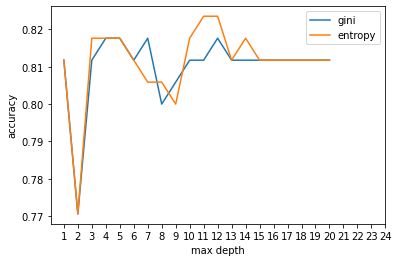

In [109]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

max_depth = []
acc_gini = []
acc_entropy = []

for i in range(1,21):
  dtree =  DecisionTreeClassifier(criterion =  "gini", max_depth = i,random_state=0)
  dtree.fit(x_train, y_train)
  pred = dtree.predict(x_test)
  acc_gini.append(accuracy_score(y_test, pred))

  dtree =  DecisionTreeClassifier(criterion =  "entropy", max_depth = i,random_state=0)
  dtree.fit(x_train, y_train)
  pred = dtree.predict(x_test)
  acc_entropy.append(accuracy_score(y_test, pred))

  max_depth.append(i)


df = pd.DataFrame({"acc_gini" : pd.Series(acc_gini),
                   "acc_entropy" : pd.Series(acc_entropy), 
                   "max_depth" : pd.Series(max_depth)})

plt.plot("max_depth", "acc_gini", data = df, label = "gini")
plt.plot("max_depth", "acc_entropy", data =df , label = "entropy")
plt.xlabel("max depth")
plt.ylabel("accuracy")
plt.xticks([j for j in range(1,25)])
plt.legend()
plt.show()

In [110]:
dtree =  DecisionTreeClassifier(criterion =  "entropy", max_depth = 11,random_state=0)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=11, random_state=0)

In [111]:
y_pred=dtree.predict(x_test)

In [112]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[89, 11],
       [19, 51]], dtype=int64)

In [113]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8235294117647058

In [114]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.8225806451612904

In [115]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.7285714285714285

In [116]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.7727272727272727

In [117]:
from sklearn.model_selection import cross_val_score
estimator = cross_val_score(estimator = dtree, X = x_train, y = y_train, cv = 30)
estimator.mean()

0.7911067193675889

In [118]:
y_pred_New=dtree.predict([[1,0,38.0,1,0,1,0,0]])
y_pred_New

C:\Users\sun\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

## Training the Logistic Regression model on the Training set

In [119]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

C:\Users\sun\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [123]:
y_pred1=classifier.predict(x_test)

In [124]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred1)

array([[90, 10],
       [21, 49]], dtype=int64)

In [125]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred1)

0.8176470588235294

In [127]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred1)

0.7596899224806201

# feature scaling

In [128]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

# Training the SVM model on the Training set

In [130]:
from sklearn.svm import SVC
classifier2 = SVC(kernel = 'linear', random_state = 0)
classifier2.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [131]:
y_pred2=classifier2.predict(X_test)

In [132]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred2)

array([[93,  7],
       [25, 45]], dtype=int64)

In [133]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred2)

0.8117647058823529

In [134]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred2)

0.7377049180327869

In [135]:
from sklearn.svm import SVC
classifier3 = SVC(kernel = 'rbf', random_state = 0)
classifier3.fit(X_train, y_train)

SVC(random_state=0)

In [136]:
y_pred3=classifier3.predict(X_test)

In [138]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred3)

array([[98,  2],
       [29, 41]], dtype=int64)

In [139]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred3)

0.8176470588235294

In [140]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred3)

0.7256637168141594